### Importação do nosso arquivo .csv

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from dotenv import load_dotenv
import os

load_dotenv() 

data_path = os.getenv("DATA_PATH")

df = pd.read_csv(data_path)
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 08:26,3.39,17850.0,United Kingdom


## Aqui verifica o tipo das colunas e também se temos valores nulos

In [2]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [3]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### Estamos removendo caso tivermos algum valor nulo

In [4]:
## Remover linhas com Quantity <= 0 ou UnitPrice <= 0
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

print("Quantidade inválida:", (df['Quantity'] <= 0).sum())
print("Preço inválido:", (df['UnitPrice'] <= 0).sum())


Quantidade inválida: 0
Preço inválido: 0


### Aqui criamos uma nova coluna para previsão do total por cada compra

In [5]:
# Criar coluna com o total da transação
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Conferir se deu certo
df[['Quantity', 'UnitPrice', 'TotalPrice']].head()


,Quantity,UnitPrice,TotalPrice
0,6,2.55,15.30
1,6,3.39,20.34
2,8,2.75,22.00
3,6,3.39,20.34
4,6,3.39,20.34


### Definir variável alvo (y) e features (X)

In [7]:
y = df['TotalPrice']
X = df[['Quantity', 'UnitPrice']]

### treino e teste

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

### Treinando o modelo

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Crição das previsões - yPred

In [10]:
y_pred = model.predict(X_test)
y_pred[:5]

array([10.68047035, 10.07111754,  8.38582673,  1.64760828,  9.76791353])

Erro Médio Absoluto (MAE): 10.8
Erro Quadrático Médio (MSE): 16606.44
Raiz do Erro Quadrático Médio (RMSE): 128.87
Ajuste do Modelo (R² Score): 0.14


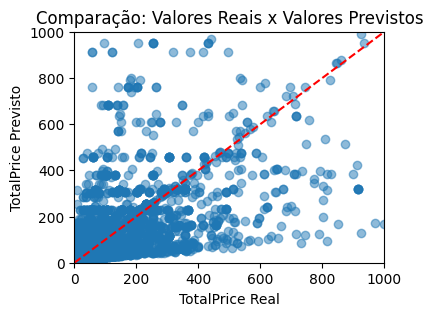

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


# Calcular métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # raiz quadrada do MSE
r2 = r2_score(y_test, y_pred)

# Arredondar para 2 casas decimais
mae = round(mae, 2)
mse = round(mse, 2)
rmse = round(rmse, 2)
r2 = round(r2, 2)

# Exibir resultados
print(f"Erro Médio Absoluto (MAE): {mae}")
print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse}")
print(f"Ajuste do Modelo (R² Score): {r2}")

# Visualizar valores reais vs previstos
plt.figure(figsize=(4,3))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.xlabel("TotalPrice Real")
plt.ylabel("TotalPrice Previsto")
plt.title("Comparação: Valores Reais x Valores Previstos")
plt.show()


In [12]:
# Criar uma coluna com o erro absoluto
df_test = X_test.copy()
df_test['Real'] = y_test
df_test['Previsto'] = y_pred
df_test['Erro_Abs'] = abs(df_test['Real'] - df_test['Previsto'])

# Mostrar as 10 transações com maior erro
df_test.sort_values(by='Erro_Abs', ascending=False).head(10)


,Quantity,UnitPrice,Real,Previsto,Erro_Abs
222680,60,649.50,38970.00,757.207674,38212.792326
348325,1412,5.06,7144.72,2240.101341,4904.618659
433788,3000,0.32,960.00,4749.451230,3789.451230
467804,688,6.95,4781.60,1095.763444,3685.836556
91772,2400,0.06,144.00,3799.241176,3655.241176
160544,670,6.35,4254.50,1066.652804,3187.847196
201149,2700,0.42,1134.00,4274.580917,3140.580917
125282,2160,0.25,540.00,3419.457180,2879.457180
282266,384,8.15,3129.60,615.682711,2513.917289
490502,1600,0.25,400.00,2532.842103,2132.842103
